<a href="https://colab.research.google.com/github/SOORYANARAYANANDR/SmartInternz-Assignments/blob/main/ASSIGNMENT_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ASSIGNMENT_5


Understand the data

In [ ]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth ,SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

In [ ]:
#for loading data
df = pd.read_csv(r"C:/Users/sonudr/Downloads/archive/Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


2.Data Preprocessing

In [ ]:
#for checking the statical summary of data frame
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#for checking nul values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#for checking duplicate values
df.duplicated().sum()

0

In [ ]:
#for checking unique values
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [ ]:
column_to_drop = 'CustomerID'
df.drop(column_to_drop, axis=1, inplace=True)

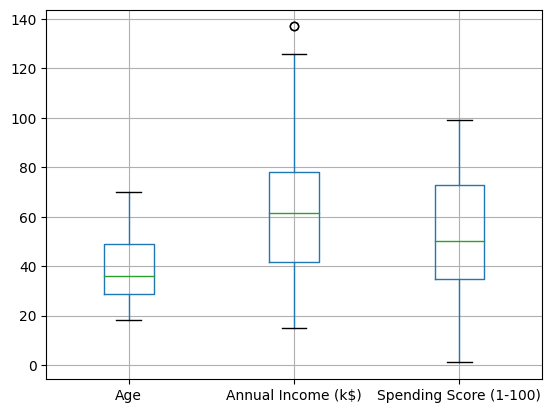

In [ ]:
df.boxplot()
plt.show()

Model Building

In [ ]:
X= df.iloc[:, [2,3]].values

In [ ]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

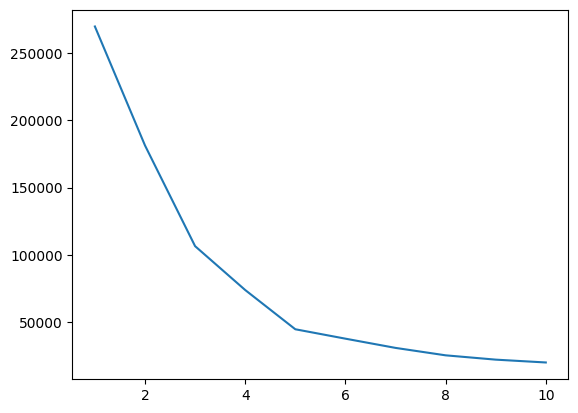

In [ ]:
plt.plot(range(1,11),wcss)
plt.show()

Machine Learning approach with clustering algorithm -K-Mean

In [ ]:
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


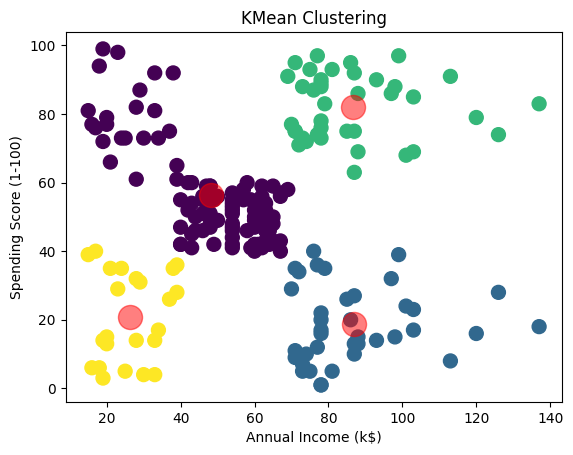

In [ ]:
labels_km4 = km.labels_

# Get the cluster centroids
centroids_km4 = km.cluster_centers_

plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, c=labels_km4, s=100)
plt.scatter(x=centroids_km4[:, 0], y=centroids_km4[:, 1], s=300, c='red', alpha=0.5)
plt.ylabel('Spending Score (1-100)')
plt.xlabel('Annual Income (k$)')
plt.title('KMean Clustering')
plt.show()

In [ ]:
inertia_score = km.inertia_
print("inertia_score of 4 clucters:",inertia_score)

inertia_score of 4 clucters: 73679.78903948836


In [ ]:
silhouette_km4 = silhouette_score(X, labels_km4)
print("Silhouette Score  of 4 clusters:", silhouette_km4)

Silhouette Score  of 4 clusters: 0.4931963109249047
